In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [204]:
def b_spline_basis(t, k, i, knots):
    if k == 0:
        return 1.0 if knots[i] <= t <= knots[i + 1] else 0.0
    else:
        left_term = 0.0
        if knots[i + k] != knots[i]:
            left_term = ((t - knots[i]) / (knots[i + k] - knots[i])) * b_spline_basis(t, k - 1, i, knots)

        right_term = 0.0
        if knots[i + k + 1] != knots[i + 1]:
            right_term = ((knots[i + k + 1] - t) / (knots[i + k + 1] - knots[i + 1])) * b_spline_basis(t, k - 1, i + 1, knots)

        return left_term + right_term

In [179]:
def plot_bspline_basis(degree, knot_vector):
    t_vals = np.linspace(0, 1, 400)
    basis_functions = []

    for i in range(len(knot_vector) - degree - 1):
        basis = [b_spline_basis(t, degree, i, knot_vector) for t in t_vals]
        basis_functions.append(basis)
        plt.plot(t_vals, basis, label=f'B{i}(t)')

    plt.title('B-spline Basis Functions')
    plt.xlabel('t')
    plt.ylabel('Basis Value')
    plt.legend()
    plt.grid(True)
    plt.show()
    return basis_functions

In [225]:
knots_num = 8 # knots_num > degree + 2
degree = 1  # degree < knots_num + 2 but makes sense degree >= knots_num - 1
degree_plus_one = degree + 1

internal_degree = knots_num - degree_plus_one

internal_knots = np.linspace(0, 1, internal_degree)
open_unif_knots = [0.] * degree_plus_one + list(internal_knots) + [1.] * degree_plus_one

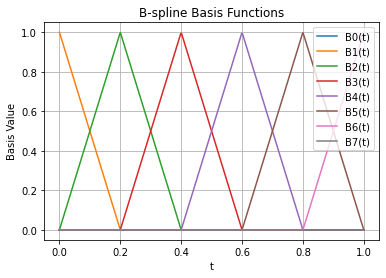

In [226]:
basis_evals = plot_bspline_basis(degree=degree, knot_vector=open_unif_knots)

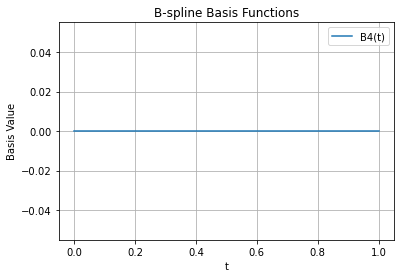

In [224]:
i=4
t_vals = np.linspace(0, 1, 400)
basis = [b_spline_basis(t, degree, i, open_unif_knots) for t in t_vals]
plt.plot(t_vals, basis, label=f'B{i}(t)')
plt.title('B-spline Basis Functions')
plt.xlabel('t')
plt.ylabel('Basis Value')
plt.legend()
plt.grid(True)
plt.show()

In [227]:
print(len(basis_evals))
internal_coefs = np.array([-1, 1, 0,1 ,1 ,1])
coefs = np.concatenate(([0.], internal_coefs, [0.]))

8


In [228]:
np_coefs = coefs.reshape(-1,1)
np_basis_evals = np.array(basis_evals)

In [229]:
experiment = np_basis_evals.T @ coefs

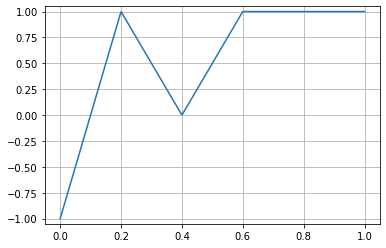

In [230]:
give = 0.05
plt.plot(np.linspace(0, 1, 400), experiment, label='Experiment')
plt.xlim(-(0 + give), (1 + give))
plt.ylim(-(1 + give), (1 + give))
plt.grid(True)
plt.show()